# Sprite Attitude and Orbital Dynamics

In [18]:
from IPython.display import Latex
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
import numpy.linalg
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
import random

Ultimately, the orbital dynamics model for the Sprites will include first and second-order gravitational terms, solar pressure, and atmospheric drag. Higher-order geopotential terms and third-body perturbations are neglected because they are negligibly small in comparison to the dominant terms and perturbations. For sake of testing, the models for both orbital and attitude dynamics will be built up modularly. For a first iteration, the orbital dynamics will include only the first two terms of the geopotential model, omitting external forces.

## Orbital Dynamics

### Theory

The Lagrangian for the spacecraft is formed by subtracting the potential from the kinetic energy:

\begin{align}
\mathcal{L} &= T-V
\end{align}

#### Kinetic Energy

We will operate in an Earth-Centered Inertial coordinate frame. This places the origin on the center of the Earth, and lets the Earth rotate on top of the static coordinate system. In this coordinate system, the kinetic energy of the spacecraft is given simply by:

\begin{align}
T &= \frac{1}{2}m\dot{\underline{r}}^{2}
\end{align}

where $\underline{\dot{r}}$ is the time derivative of the position of the spacecraft. In an ECI coordinate frame, the position of the spacecraft is given by:

\begin{align}
\underline{r} &= x\hat{i} + y\hat{j} + z\hat{k}
\end{align}

Taking the time derivative:

\begin{align}
\underline{\dot{r}} &= \dot{x}\hat{i} + \dot{y}\hat{j} + \dot{z}\hat{k}\\
&= \begin{bmatrix}
\dot{x}\\\dot{y}\\\dot{z}
\end{bmatrix}
\end{align}

This gives a kinetic energy expression:

\begin{align}
T &= \frac{1}{2}m\underline{\dot{r}}^T\underline{\dot{r}}\\
&= \frac{1}{2}m\left[\dot{x}^2 + \dot{y}^2 + \dot{z}^2\right]
\end{align}

#### Potential Energy

The first two terms of the gravitational potential expression:

\begin{align}
V &= -\frac{G M_{E}m}{||\underline{r}||} + \frac{J_2m}{2||\underline{r}||^5}(3z^2 - ||\underline{r}||^2)
\end{align}

The first term is the point-mass gravitational term (dominant), the second is the J2 term associated with Earth's equatorial oblateness. This terms causes nodal precession of the Sprite orbits. Rewriting in terms of the state variables:

\begin{align}
V &= -\frac{G M_{E}m}{\left(x^2 + y^2 + z^2\right)^\frac{1}{2}} + \frac{J_2m}{2\left(x^2+y^2+z^2\right)^{\frac{5}{2}}} \left(3z^2 - \left(x^2+y^2+z^2\right)\right)
\end{align}

#### Assemble Lagrangian

Putting the kinetic and potential energy together:

\begin{align}
\mathcal{L} &= T - V\\
&= \frac{1}{2}m\left[\dot{x}^2 + \dot{y}^2 + \dot{z}^2\right]+\frac{G M_{E}m}{\left(x^2 + y^2 + z^2\right)^\frac{1}{2}} - \frac{J_2m}{2\left(x^2+y^2+z^2\right)^{\frac{5}{2}}} \left(3z^2 - \left(x^2+y^2+z^2\right)\right)
\end{align}

#### Euler-Lagrange Equation

In order to find the equation of motion for each state variable ($x$, $y$, $z$), we solve the Euler-Lagrange Equation:

\begin{align}
\frac{\partial{\mathcal{L}}}{\partial{q_i}} - \frac{d}{dt}\frac{\partial{\mathcal{L}}}{\partial{\dot{q_i}}} &= Q_{i}
\end{align}

Since, for now, we are assuming no external forces, $Q_i = 0$. $q_i$ is the $i^{th}$ state variable. Solving:

\begin{align}
\frac{d}{dt}\frac{\partial{\mathcal{L}}}{\partial{\dot{x}}} &= m\ddot{x}\\
\frac{\partial{\mathcal{L}}}{\partial{x}} &= -\frac{G m M_e x}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 m x \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}+\frac{J_2 m x}{\left(x^2+y^2+z^2\right)^{5/2}}
\end{align}

Thus, the equation of motion for the $x$ state variable is given by:

\begin{align}
0 &= -\frac{G m M_e x}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 m x \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}+\frac{J_2 m x}{\left(x^2+y^2+z^2\right)^{5/2}} - m\ddot{x}\\
\ddot{x} &=  -\frac{G M_e x}{\left(x^2+y^2+z^2\right)^{3/2}} + \frac{5 J_2 x \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}} + \frac{J_2 x}{\left(x^2+y^2+z^2\right)^{5/2}}
\end{align}

Similarly for $y$:

\begin{align}
\frac{d}{dt}\frac{\partial{\mathcal{L}}}{\partial{\dot{y}}} &= m\ddot{y}\\
\frac{\partial{\mathcal{L}}}{\partial{y}} &= -\frac{G m M_e y}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 m y \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}+\frac{J_2 m y}{\left(x^2+y^2+z^2\right)^{5/2}}
\end{align}

Thus, the equation of motion for $y$:

\begin{align}
0 &= -\frac{G m M_e y}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 m y \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}+\frac{J_2 m y}{\left(x^2+y^2+z^2\right)^{5/2}} - m\ddot{y}\\
\ddot{y} &= -\frac{G M_e y}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 y \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}+\frac{J_2 y}{\left(x^2+y^2+z^2\right)^{5/2}}
\end{align}

And finally for $z$:

\begin{align}
\frac{d}{dt}\frac{\partial{\mathcal{L}}}{\partial{\dot{z}}} &= m\ddot{z}\\
\frac{\partial{\mathcal{L}}}{\partial{z}} &= -\frac{G m M_e z}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 m z \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}-\frac{2 J_2 m z}{\left(x^2+y^2+z^2\right)^{5/2}}
\end{align}

Giving the equation of motion:

\begin{align}
0 &= -\frac{G m M_e z}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2 m z \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}-\frac{2 J_2 m z}{\left(x^2+y^2+z^2\right)^{5/2}} - m\ddot{z}\\
\ddot{z} &= -\frac{G  M_e z}{\left(x^2+y^2+z^2\right)^{3/2}}+\frac{5 J_2  z \left(-x^2-y^2+2 z^2\right)}{2 \left(x^2+y^2+z^2\right)^{7/2}}-\frac{2 J_2  z}{\left(x^2+y^2+z^2\right)^{5/2}}
\end{align}

#### State-Space Representation

Represent the differential equations of motion in state space:

\begin{align}
q_1 = x && \dot{q}_{1}=\dot{x}&=q_4\\
q_2 = y && \dot{q}_2 = \dot{y}&=q_5\\
q_3 = z && \dot{q}_3 = \dot{z}&=q_6\\
q_4 = \dot{x} && \dot{q}_{4} = \ddot{x} &= -\frac{\mu_E q_1}{\left(q_1^2+q_2^2+q_3^2\right)^{3/2}} + \frac{5 J_2 q_1 \left(-q_1^2-q_2^2+2 q_3^2\right)}{2 \left(q_1^2+q_2^2+q_3^2\right)^{7/2}} + \frac{J_2 q_1}{\left(q_1^2+q_2^2+q_3^2\right)^{5/2}}\\
q_5 = \dot{y} && \dot{q}_5 = \ddot{y} &= -\frac{\mu_E q_2}{\left(q_1^2+q_2^2+q_3^2\right)^{3/2}}+\frac{5 J_2 q_2 \left(-q_1^2-q_2^2+2 q_3^2\right)}{2 \left(q_1^2+q_2^2+q_3^2\right)^{7/2}}+\frac{J_2 q_2}{\left(q_1^2+q_2^2+q_3^2\right)^{5/2}}\\
q_6 = \dot{z} && \dot{q}_6 = \ddot{z} &= -\frac{\mu_E q_3}{\left(q_1^2+q_2^2+q_3^2\right)^{3/2}}+\frac{5 J_2  q_3 \left(-q_1^2-q_2^2+2 q_3^2\right)}{2 \left(q_1^2+q_2^2+q_3^2\right)^{7/2}}-\frac{2 J_2  q_3}{\left(q_1^2+q_2^2+q_3^2\right)^{5/2}}
\end{align}

### Implementation

#### Gravitational Parameters

Define the necessary paramters for the problem. These include the standard gravitational parameter of the Earth and the J2 constant.

In [2]:
mu_e = 398600.4418   # Earth graviational parameter, (km^3)/(sec^2)
J2   = 1.7555e10     # J2, (km^5)/(sec^2)
R_e  = 6371.         # Radius of Earth, km

#### Derivatives Function

Write a function that takes the state, $\begin{bmatrix}x & y & z & \dot{x} & \dot{y} & \dot{z}\end{bmatrix}$ and returns the time derivative of each state variable, $\begin{bmatrix}\dot{x} & \dot{y} & \dot{z} & \ddot{x} & \ddot{y} & \ddot{z}\end{bmatrix}$.

In [3]:
def orbitalDerivatives(X, t):
    x, y, z, xdot, ydot, zdot = X
    
    R = (x**2. + y**2. + z**2.)**(1./2.)
    term0 = -mu_e/(R**3.)
    term1 = (5.*J2*(-x**2. - y**2. + 2.*(z**2.)))/(2.*(R**7.))
    term2 = J2/(R**5.)
    
    xddot = term0*x + term1*x + term2*x
    yddot = term0*y + term1*y + term2*y
    zddot = term0*z + term1*z - term2*z*2.
    
    return [xdot, ydot, zdot, xddot, yddot, zddot]

#### Simulation Parameters

Define some parameters relevant to the simulation. These include total runtime and stepsize, and initial conditions assuming ISS deployment.

In [21]:
totaltime = numpy.arange(0, 100000, 1)
initial_position = numpy.array([400., 0., 0.])
initial_velocity = numpy.array([0., 4.76001, 6.01425])

#### Run Simulation for Single Set of Initial Conditions

The function below takes a set of initial conditions and propagates them for totaltime (above).

#### Monte Carlo

The function below randomizes the initial velocities of a number of Sprites to simulate deployment from a KickSat deployer. Each chip's orbit is propagated independently.

In [ ]:
def runMonteCarlo(N):
    pos_initial = initial_position
    for i in range(N):
        vel_initial = 

#### Visualize Simulation Results

Takes a list of trajectories, plots them with the Earth.

In [23]:
def showResults(results):
    fig = plt.figure()
    ax = plt.gca(projection='3d')
    ax._axis3don = False
    ax.set_aspect('equal')
    
    for run in results:
        ax.plot(run[:,0], run[:,1], run[:,2])
    
    # Draw the Earth
    u, v = numpy.mgrid[0:2*numpy.pi:20j, 0:numpy.pi:10j]
    x=R_e*numpy.cos(u)*numpy.sin(v)
    y=R_e*numpy.sin(u)*numpy.sin(v)
    z=R_e*numpy.cos(v)
    ax.plot_wireframe(x, y, z, color="r", alpha=0.1)
    
    # Configure the plot
#     ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    
    # Show the plot
    plt.show()

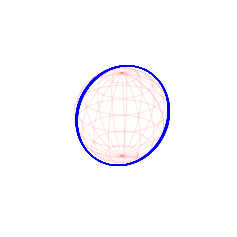

In [24]:
showResults([runSim(initial_position, initial_velocity)])